### Importing Libraries

In [1]:
# DataFlair Iris Classification
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
#Naming the columns
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels'] # As per the iris dataset information

In [3]:
# Loading the data
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=columns)

In [4]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Some basic statistical analysis about the data
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Mapping Categorical labels to Numerical values

In [6]:
mapping = {"Iris-setosa": 0,"Iris-versicolor": 1, "Iris-virginica": 2}
df["ClassLabels"] = df["Class_labels"].map(mapping)

print(df)

     Sepal length  Sepal width  Petal length  Petal width    Class_labels  \
0             5.1          3.5           1.4          0.2     Iris-setosa   
1             4.9          3.0           1.4          0.2     Iris-setosa   
2             4.7          3.2           1.3          0.2     Iris-setosa   
3             4.6          3.1           1.5          0.2     Iris-setosa   
4             5.0          3.6           1.4          0.2     Iris-setosa   
..            ...          ...           ...          ...             ...   
145           6.7          3.0           5.2          2.3  Iris-virginica   
146           6.3          2.5           5.0          1.9  Iris-virginica   
147           6.5          3.0           5.2          2.0  Iris-virginica   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

     ClassLabels  
0              0  
1              0  
2              0  

### Removing Categorical label Column

In [7]:
df = df.drop('Class_labels',axis=1)

In [8]:
y = df['ClassLabels']
X = df.drop('ClassLabels',axis=1)
X.shape, y.shape

((150, 4), (150,))

### Splitting the dataset into Train and Test sets: 75-25 split

In [9]:
from sklearn.model_selection import train_test_split,cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25, 
                                                    random_state = 12)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

### Logistic Regression using Scikit-learn

In [10]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(X_train,y_train)
prediction=model_LR.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.9736842105263158


In [11]:
predictions = model_LR.predict(X_test)
# Calculate the accuracy
from sklearn.metrics import accuracy_score, recall_score,precision_score,f1_score
accuracy_lr = accuracy_score(y_test, predictions)
accuracy_lr

0.9736842105263158

In [12]:
print("Train Accuracy ",accuracy_score(model_LR.predict(X_train),y_train))
print("Test Accuracy ",accuracy_score(model_LR.predict(X_test),y_test))

Train Accuracy  0.9732142857142857
Test Accuracy  0.9736842105263158


### Classification report for Linear Regression using Scikit-Learn

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.92      0.96        12
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [14]:
cross_val_scores = cross_val_score(model_LR, X, y, cv=10)
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation accuracy:", cross_val_scores.mean())

Cross-validation scores: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]
Mean cross-validation accuracy: 0.9733333333333334


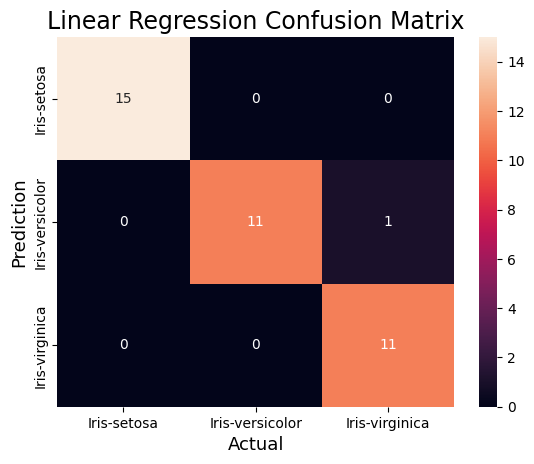

In [15]:
y_pred = model_LR.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, 
            annot=True,
            xticklabels=['Iris-setosa','Iris-versicolor','Iris-virginica'],
            yticklabels=['Iris-setosa','Iris-versicolor','Iris-virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Linear Regression Confusion Matrix',fontsize=17)
plt.show()

### Least Square Estimator

In [16]:
X_train_aug = np.c_[X_train, np.ones(X_train.shape[0])]
X_test_aug = np.c_[X_test, np.ones(X_test.shape[0])]
theta = np.linalg.inv(X_train_aug.T.dot(X_train_aug)).dot(X_train_aug.T).dot(y_train)

In [17]:
y_pred_test_ls = np.round(X_test_aug.dot(theta))
y_pred_train_ls = np.round(X_train_aug.dot(theta))
accuracy_ls = accuracy_score(y_test, y_pred_test_ls)
accuracy_ls

1.0

In [18]:
print("Train Accuracy ",accuracy_score(y_pred_train_ls,y_train))
print("Test Accuracy ",accuracy_score(y_pred_test_ls,y_test))

Train Accuracy  0.9642857142857143
Test Accuracy  1.0


In [19]:
print("Accuracy of Linear Regression (Scikit-learn):", accuracy_lr)
print("Accuracy of Least Squares Estimator:", accuracy_ls)

Accuracy of Linear Regression (Scikit-learn): 0.9736842105263158
Accuracy of Least Squares Estimator: 1.0


### Classification report for Linear Regression using Least Squares Estimator

In [20]:
print(classification_report(y_test, y_pred_test_ls))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



### Linear Regression vs Least Square Estimator

In [22]:
! pip install tabulate
import pandas as pd
from tabulate import tabulate

# Define the metrics for each model (example values)
models = ['Linear Regression using scikit-learn', 'Least Square Estimator']
test_accuracy = [accuracy_score(y_test, predictions),accuracy_score(y_pred_test_ls,y_test)]
train_accuracy = [accuracy_score(model_LR.predict(X_train),y_train),accuracy_score(y_pred_train_ls,y_train)]
mean_cross_val_score = [cross_val_score(model_LR, X, y, cv=10).mean(), cross_val_score(model_LR, X_train_aug, y_train, cv=10).mean()]
# dictionary to store the metrics
metrics_dict = {
    'Model': models,
    'Test Accuracy': test_accuracy,
    'Train Accuracy': train_accuracy,
    'Mean Cross Validation Score': mean_cross_val_score
}

metrics_df = pd.DataFrame(metrics_dict, index=models)
metrics_df.set_index('Model', inplace=True)
metrics_df = metrics_df.T

print(tabulate(metrics_df, headers='keys', tablefmt='grid'))

+-----------------------------+----------------------------------------+--------------------------+
|                             |   Linear Regression using scikit-learn |   Least Square Estimator |
+=============================+========================================+==========================+
| Test Accuracy               |                               0.973684 |                 1        |
+-----------------------------+----------------------------------------+--------------------------+
| Train Accuracy              |                               0.973214 |                 0.964286 |
+-----------------------------+----------------------------------------+--------------------------+
| Mean Cross Validation Score |                               0.973333 |                 0.964394 |
+-----------------------------+----------------------------------------+--------------------------+
